In [2]:
import numpy as np
import matplotlib.pyplot as plt

For small x $e^x$ resembles the function $m \cdot x+1$

In [11]:
t = np.linspace(0,20, 300)

y = lambda t, R, x=1: np.exp((R*0.12*x-0.12)*t)

Rs = np.linspace(0.5, 1, 10, endpoint=True)

ys = np.array([y(t, R) for R in Rs]).T

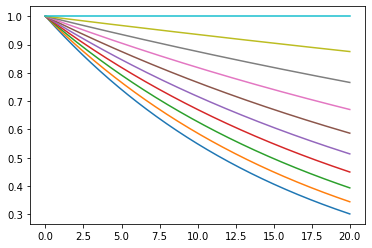

In [12]:
plt.plot(t, ys)

In [71]:
from scipy.integrate import solve_ivp # Besserer Integrator

In [72]:
l = 10
Rs = np.linspace(0.5, 1.5, l)
beta = 0.12
mindt = 1.
def lockdown():
    ret = Rs * beta
    return ret

In [73]:
def odes(t, p):
    global oldTime
    x = p[:l]
    y = p[l:2*l]
    z = p[2*l:]
    
    alpha = lockdown().flatten()
    
    dx = - alpha *x*y
    dz = beta *y
    dy = -(dx+dz)
    
    return np.concatenate([dx,dy,dz])

In [74]:
N = 8.2 * 10**7
infected = 2* 10**5/N
removed = 2.1*10**6/N
notInfected = 1 - infected - removed

matrix = np.ones((l))
p0 = np.array([notInfected*matrix, infected*matrix, removed *matrix]).flatten()

In [75]:
sol = solve_ivp(odes, (0,10), p0, max_step=mindt, args=())
p=sol.y
t = sol.t

In [76]:
x = p[:l]
y = p[l:2*l].T
z = p[2*l:]

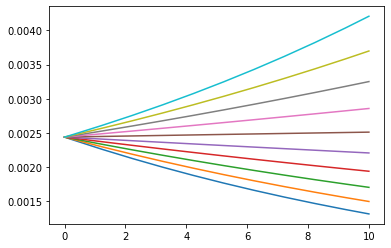

In [77]:
plt.plot(t,y)